In [185]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 7.5, 7.5

Aditya Kharosekar amk3587
Rahul Jain rj8656

# Problem 1

In [118]:
mean1 = [0, 0, 0]
covMatrix1 = [[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]

mean2 = [0, 0, 1]
covMatrix2 = [[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]]

first = np.random.multivariate_normal(mean1, covMatrix1, 20)
second = np.random.multivariate_normal(mean2, covMatrix2, 20)

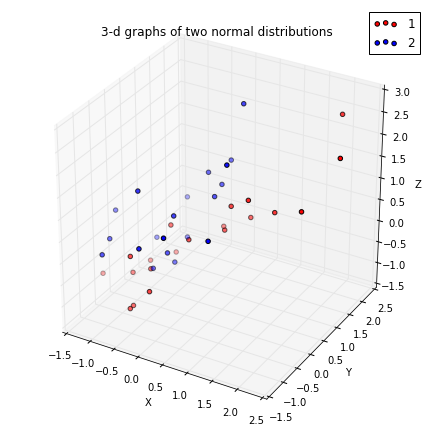

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(first[:,0], first[:,1], zs = first[:,2], c="r", label="1")
ax.scatter(second[:,0], second[:,1], zs = second[:,2], c="b", label="2")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
legend = ax.legend(loc="upper right")
plt.title("3-d graphs of two normal distributions")
plt.show()

## Part 2

In [120]:
def calcFischer(first, second, title):
    mean1 = [np.mean(first[:,0]), np.mean(first[:,1]),np.mean(first[:,2])]
    mean2 = [np.mean(second[:,0]), np.mean(second[:,1]),np.mean(second[:,2])]

    #Calculating between variance (Sb)
    difference = np.subtract(mean2, mean1)
    difference = np.reshape(difference, (3,1))
    Sb = np.dot(difference, np.transpose(difference))


    #Calculating within variance (Sw)
    sumFirst = 0.0
    sumSecond = 0.0

    for point in first:
        difference = np.subtract(point, mean1)
        difference = np.reshape(difference, (3,1))
        sumFirst += np.dot(difference, np.transpose(difference))

    for point in second:
        difference = np.subtract(point, mean2)
        difference = np.reshape(difference, (3,1))
        sumSecond += np.dot(difference, np.transpose(difference))

    Sw = np.add(sumFirst, sumSecond)
    newMatrix = np.dot(np.linalg.inv(Sw), Sb)
    U, s, V = np.linalg.svd(newMatrix, compute_uv = True)
    V[0] #This is the eigenvector related to the largest eigenvalue
    # We need to project the data onto this vector
    
    newaxis = V[0]
    newaxis = np.reshape(newaxis, (3,1))
    newprojection1 = np.dot(first, newaxis)
    newprojection2 = np.dot(second, newaxis)
    y = np.zeros(20)

    plt.scatter(newprojection1, y, c="r", label = "1")
    plt.scatter(newprojection2, y, c="b", label = "2")
    plt.legend(loc = "upper right")
    plt.title(title)
    plt.show()

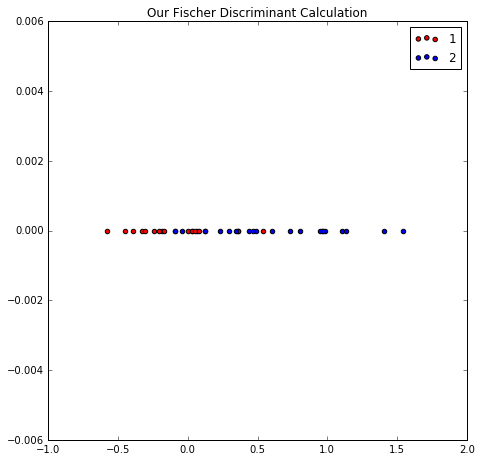

In [121]:
calcFischer(first, second,"Our Fischer Discriminant Calculation")

## Part c

In [122]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
X = np.concatenate((first, second))
y1 = np.ones((20,))
y2 = np.multiply(np.ones((20,)), 2)
y = np.concatenate((y1, y2))
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

We need to test the inbuilt LDA function with the calculations that we did by hand. For this, I will create two new random sets of data points.

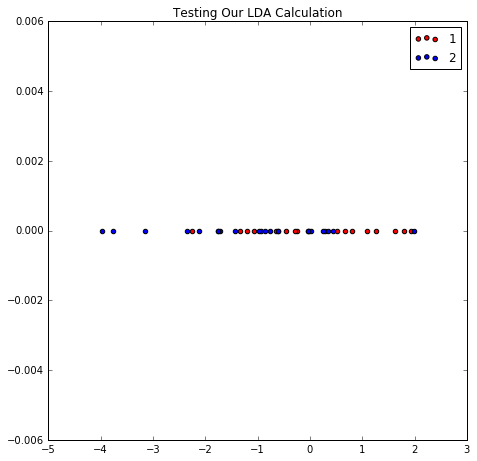

In [123]:
d1 = np.random.multivariate_normal(mean1, covMatrix1, 20)
d2 = np.random.multivariate_normal(mean2, covMatrix2, 20)
d = np.concatenate((d1, d2))

testValues1 = np.ones((20,))
testValues2 = np.multiply(np.ones((20,)), 2)
testValues = np.concatenate((testValues1, testValues2))
calcFischer(d1, d2, "Testing Our LDA Calculation")

On these two new datasets, our calculated Fischer Discriminant leads to the above projection.

From inspection, it seems that a value of approximately 0 to -0.5 on the horizontal axis is the dividing line between the two datasets. If we used this model, we would say that to the right of this line would be the second dataset and to the left is the first dataset. 

Let's see how that compares with the scikit-learn inbuilt implementation of Linear Discriminant Analysis.

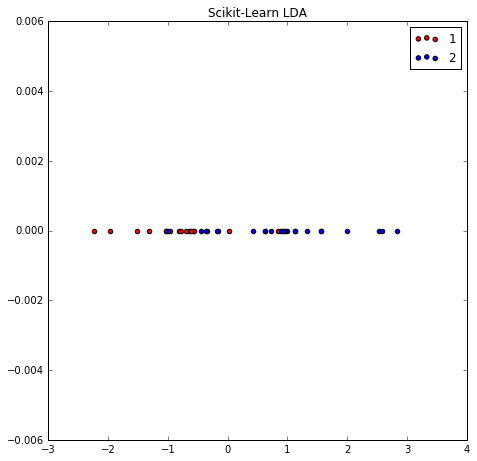

In [124]:
inbuiltResults = clf.transform(d)
plt.scatter(inbuiltResults[:20], np.reshape(np.zeros(20), (20,1)), c="r", label="1")
plt.scatter(inbuiltResults[20:], np.reshape(np.zeros(20), (20,1)), c="b", label="2")
plt.legend(loc = "upper right")
plt.title("Scikit-Learn LDA")
plt.show()

From inspection, we can see that even in this graph, which represents the projection of the data points in the direction calculated by the scikit-learn implementation of LDA, the dividing line seems to be approximately -0.5 on the horizontal axis.

Therefore, the inbuilt implementation of LDA and our calculated version agree with each other.

# Problem 2

In [195]:
data1 = pd.read_csv("CorrMat1.csv", header=None)
data3 = pd.read_csv("CorrMat3.csv", header=None)

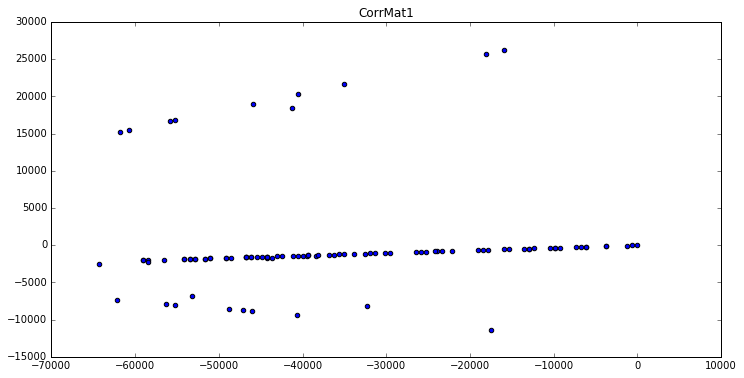

In [181]:
mat1 = np.matrix(data1)
u, s, v = np.linalg.svd(data1)

evectors = np.matrix(np.transpose([v[0], v[1]]))

newMatrix = np.dot(mat1, evectors)
plt.scatter(newMatrix[:,0], newMatrix[:,1], c = "b")
plt.title("CorrMat1")
plt.show()


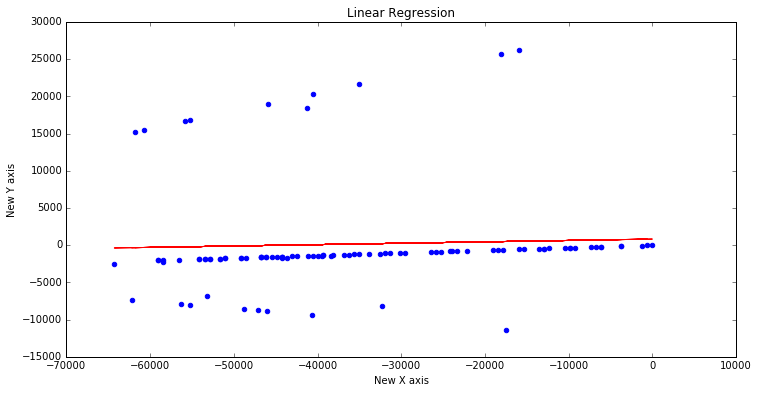

In [184]:
regr = linear_model.LinearRegression()
regr.fit(newMatrix[:,0], newMatrix[:,1])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(newMatrix[:,0], newMatrix[:,1], color="blue")
ax.plot(newMatrix[:,0], regr.predict(newMatrix[:,0]), color="red")
ax.set_xlabel("New X axis")
ax.set_ylabel("New Y axis")
ax.set_title("Linear Regression")
plt.show()

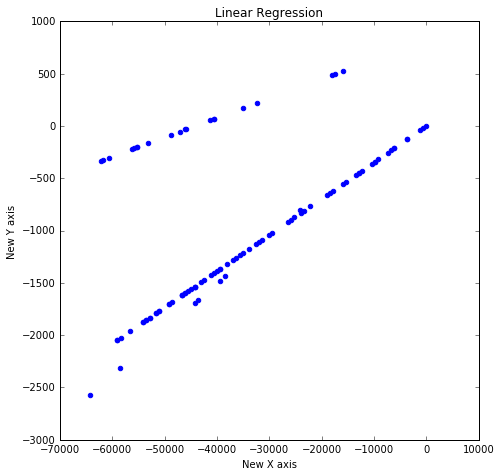

In [194]:

X = newMatrix[:,0]
Y= newMatrix[:,1]
for i in range(len(Y)):
    if(Y[i]<-5000 or Y[i]>10000):
        Y[i] = regr.intercept_ + regr.coef_*X[i]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X,Y, color="blue")
ax.set_xlabel("New X axis")
ax.set_ylabel("New Y axis")
ax.set_title("Linear Regression")
plt.show()

**EXPLAIN SHIT HERE**

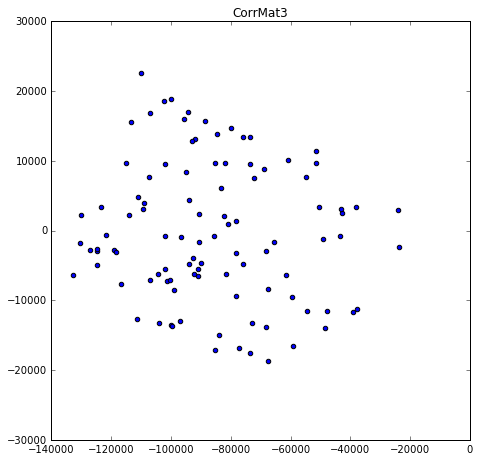

In [198]:
mat3 = np.matrix(data3)
u, s, v = np.linalg.svd(data3)

evectors = np.matrix(np.transpose([v[0], v[1]]))

newMatrix3 = np.dot(mat3, evectors)
plt.scatter(newMatrix3[:,0], newMatrix3[:,1], c = "b")
plt.title("CorrMat3")
plt.show()

In [199]:
newMatrix3

matrix([[-101280.80242945,   -7220.45952161],
        [-111359.53038234,  -12617.71922175],
        [ -81061.92851228,     931.43017921],
        [ -79858.08617674,   14731.44614363],
        [-101919.7527878 ,   -5578.25647378],
        [ -85293.15314423,    9754.42997076],
        [-130402.73064947,   -1778.28001542],
        [ -43617.5519565 ,    -817.5004086 ],
        [ -60778.36547764,   10130.56151339],
        [-124860.99496033,   -4997.47999006],
        [-116682.59679087,   -7607.68567688],
        [ -23635.29035738,   -2355.28694931],
        [ -73456.04038869,   13375.53236015],
        [-123258.72004765,    3339.9161187 ],
        [ -61523.88176406,   -6319.32024959],
        [ -82239.17578435,    2149.43955638],
        [-109302.86405334,    3096.43968883],
        [ -90881.5321198 ,   -6463.06997499],
        [ -67629.3189685 ,  -18749.27712579],
        [ -51515.61163705,   11384.17882825],
        [-132715.85540519,   -6403.56553931],
        [-107089.73384386,   -7147

# Problem 3

## First, some data preprocessing.
https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

In [130]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [131]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [132]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [133]:
rcParams['figure.figsize'] = 12.0, 6.0
prices = pd.DataFrame({"Price:": train["SalePrice"], "log(price+1)": np.log1p(train["SalePrice"])})
prices.head()

,Price:,log(price+1)
0,208500,12.247699
1,181500,12.109016
2,223500,12.317171
3,140000,11.849405
4,250000,12.429220


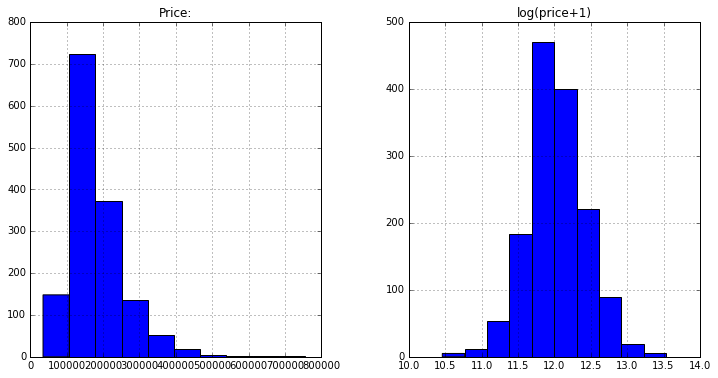

In [134]:
prices.hist()
plt.show()

In [135]:
#Removing the ID column
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [136]:
all_data = pd.get_dummies(all_data) #creates dummy variables
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [137]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [138]:
all_data.shape

(2919, 288)

In [139]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [140]:
def rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring = "mean_squared_error", cv = 5))
    return rmse

In [141]:
model_Ridge = Ridge()

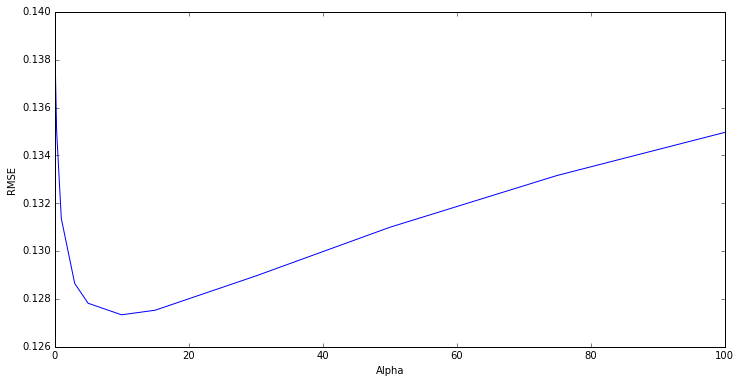

In [142]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100]
cv_ridge = [rmse(Ridge(alpha = a)).mean() for a in alphas]
cv_ridge=pd.Series(cv_ridge, index = alphas)
cv_ridge.plot()
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.show()

From the above graph, an alpha of 10 is best.

In [143]:
cv_ridge.min()

0.12733734668670763

### Lasso

In [144]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.005]).fit(X_train, y)

In [145]:
rmse(model_lasso).mean()

0.12419498942266938

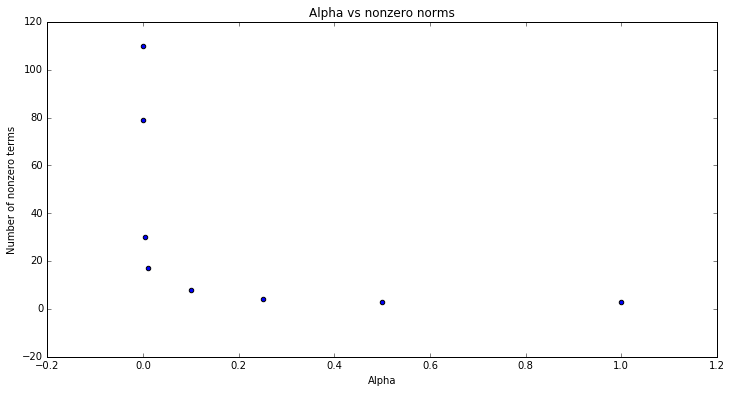

In [146]:
alphas = [1, 0.5, 0.25, 0.1, 0.01, 0.005, 0.001, 0.0005]

nonzero_norms = []
for alpha in alphas:
    model = Lasso(alpha).fit(X_train, y)
    coefs = model.coef_
    count = 0.0
    for coef in coefs:
        if coef!=0:
            count = count+1
    nonzero_norms.append(count)
plt.scatter(alphas, nonzero_norms)
plt.xlabel("Alpha")
plt.ylabel("Number of nonzero terms")
plt.title("Alpha vs nonzero norms")
plt.show()

### Ensembling and Stacking

In [147]:
new_ridge_model = Ridge(alpha = 10)
new_ridge_model.fit(X_train, y)
ridge_results = new_ridge_model.predict(X_train)
ridge_results

array([ 12.24391057,  12.17892855,  12.28836396, ...,  12.43402032,
        11.85310649,  11.85860895])

In [148]:
lasso = model_lasso.predict(X_train)

In [149]:
X_train["Ridge"] = ridge_results
X_train["Lasso"] = lasso

C:\Users\Aditya Kharosekar\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Aditya Kharosekar\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [150]:
model_Ridge = RidgeCV(alphas = [0.05, 0.1, 0.25, 0.5, 1, 3, 5, 10, 15, 30,50, 75, 100])
model_Ridge.fit(X_train, y)

RidgeCV(alphas=[0.05, 0.1, 0.25, 0.5, 1, 3, 5, 10, 15, 30, 50, 75, 100],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [151]:
ridge_score = -cross_val_score(model_Ridge, X_train, y, scoring = "mean_squared_error", cv = 5)

In [152]:
print(np.sqrt(ridge_score).mean())

0.125304467832


### XGBoost

In [153]:
import xgboost as xgb
from sklearn.grid_search import RandomizedSearchCV, GridSearchCV

In [154]:
parameters = {
    'max_depth':[1, 2, 6, 8, 10],
    'n_estimators':[25, 50, 100, 150, 200],
    'reg_alpha' : [0.001, 0.05, 0.1, 0.25, 0.5]
}

xgmodel = xgb.XGBRegressor()
xg_clf = GridSearchCV(xgmodel, parameters, cv = 5, scoring = "mean_squared_error").fit(X_train, y)

In [155]:
print(np.sqrt(-xg_clf.best_score_))

0.109467093367


In [156]:
xg_clf2 = RandomizedSearchCV(xgmodel, parameters, cv=5, scoring = "mean_squared_error").fit(X_train, y)
print(np.sqrt(-xg_clf2.best_score_))

0.110483109811


In [157]:
print(xg_clf.best_params_)
print(xg_clf2.best_params_)

{'reg_alpha': 0.001, 'max_depth': 1, 'n_estimators': 200}
{'max_depth': 1, 'reg_alpha': 0.25, 'n_estimators': 200}


## Part 6
We will try stacking 4 models on the data: xgboost, lasso, Ridge, and random forest. 
(Idea from kaggle comments) 

In [158]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Ridge,Lasso
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.243911,12.247563
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.178929,12.162937
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.288364,12.304561
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.033395,12.076531
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.607881,12.624928


In [159]:
X_train_new = X_train.ix[:,:-2]
X_train_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [160]:
xgmodel = xgb.XGBRegressor(n_estimators = 200, reg_alpha = .001, max_depth = 1)
xg_clf_new = xgmodel.fit(X_train_new, y) # training the xgboost

In [161]:
#training the random forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train_new, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [162]:
X_train["XGBoost"] = xg_clf_new.predict(X_train_new)

C:\Users\Aditya Kharosekar\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [163]:
X_train["Forest"] = forest.predict(X_train_new)

C:\Users\Aditya Kharosekar\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [164]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Ridge,Lasso,XGBoost,Forest
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,12.243911,12.247563,12.219547,12.236014
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,12.178929,12.162937,12.056585,12.103335
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,12.288364,12.304561,12.249222,12.312425
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,12.033395,12.076531,12.112557,11.891688
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,12.607881,12.624928,12.637372,12.518783


In [165]:
X_test_new = X_test.copy()

In [166]:
X_test_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.044522,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.317488,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.110874,4.369448,9.208238,6,6,1998,1998,3.044522,6.401917,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.795791,3.784190,8.518392,8,5,1992,1992,0.000000,5.575949,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [167]:
X_test["Ridge"] = new_ridge_model.predict(X_test_new)
X_test_new.shape

C:\Users\Aditya Kharosekar\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(1459, 288)

In [168]:
X_test["Lasso"] = model_lasso.predict(X_test_new)

C:\Users\Aditya Kharosekar\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [169]:
X_test["XGBoost"] = xg_clf_new.predict(X_test_new)
X_test["Forest"] = forest.predict(X_test_new)

C:\Users\Aditya Kharosekar\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Aditya Kharosekar\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [170]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Ridge,Lasso,XGBoost,Forest
0,3.044522,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,0.0,0.0,0.0,0.0,1.0,0.0,11.687132,11.688996,11.698003,11.750719
1,3.044522,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,11.938427,11.920107,11.934022,11.944255
2,4.110874,4.317488,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,12.106320,12.098437,12.098293,12.103748
3,4.110874,4.369448,9.208238,6,6,1998,1998,3.044522,6.401917,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,12.195477,12.207331,12.124110,12.137851
4,4.795791,3.784190,8.518392,8,5,1992,1992,0.000000,5.575949,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,12.207617,12.213619,12.196935,12.129296


In [171]:
xgmodel = xgb.XGBRegressor(n_estimators = 200, reg_alpha = .001, max_depth = 1)
xg_clf_new = xgmodel.fit(X_train, y) # training the xgboost

In [172]:
results = xg_clf_new.predict(X_test)

In [173]:
submission = pd.DataFrame({"Id":test.Id, "SalePrice":results})

In [174]:
submission.head()

,Id,SalePrice
0,1461,11.758322
1,1462,11.949304
2,1463,12.133189
3,1464,12.136633
4,1465,12.130102


In [175]:
submission.to_csv('submission1.csv', index= False)